# Machine Learning

We are going to include three models: KNN, decision tree and random forest.

1. Process data using different sampling strategies.
2. Implement KNN, DT and RF on the original, oversampled and undersampled dataset.
    Tune parameters to get the best performance on each model.
3. Build an ensemble model using KNN, DT and RF. Evalulate the results.

## 1. Process data using different sampling strategies.

In [2]:
import pandas as pd
import numpy as np
path = 'data/df_risk_factors_cervical_cancer.csv'
df = pd.read_csv(path, index_col = 0)

In [3]:
X = df.drop('Biopsy', axis = 1) # data without target
y = df['Biopsy'] # target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, stratify=df['Biopsy'])

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [6]:
over = RandomOverSampler(sampling_strategy=1)

In [7]:
X_overS, y_overS = over.fit_resample(X_train, y_train)

In [8]:
y_overS.value_counts()

0    642
1    642
Name: Biopsy, dtype: int64

In [9]:
under = RandomUnderSampler(sampling_strategy=1)

In [10]:
X_underS, y_underS = under.fit_resample(X_train, y_train)

In [11]:
y_underS.value_counts()

0    44
1    44
Name: Biopsy, dtype: int64

## 2. Implement KNN, Decision Tree and Random Forest

### 2.1 KNN

Find the best k for different sampling strategies.

In [80]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, recall_score, precision_score, mean_absolute_error,roc_auc_score, confusion_matrix

In [81]:
# find the k that generates the biggest AUC

def findK_auc(X_v, y_v):
    biggestauc = 0
    smallestk = 1
    aucs = []
    for k in range(1, 70):
        knn = KNeighborsClassifier(n_neighbors = k) # 1
        knn.fit(X_v, y_v)
        y_pred_v = knn.predict(X_test)
        auc = roc_auc_score(y_test, y_pred_v)
        if (auc > biggestauc):
            smallestk = k
            biggestauc = auc
        aucs.append(auc)
    plt.plot(range(1, 70), aucs)
    print(smallestk)
    print(biggestauc)

In [60]:
# give feedback on [1]accuracy, [2]AUC, [3]confusion matrix, [4]TPR.
def getFeedback(y_t, y_p):
    print("- Accuracy")
    print(precision_score(y_t, y_p))
    print("- Recall")
    print(recall_score(y_t, y_p))
    print("- AUC")
    print(roc_auc_score(y_t, y_p))
    print("- Confusion Matrix")
    cm = confusion_matrix(y_t, y_p)
    print(cm)

In [85]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation

### 2.1.1 Original Dataset

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

4
0.5


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

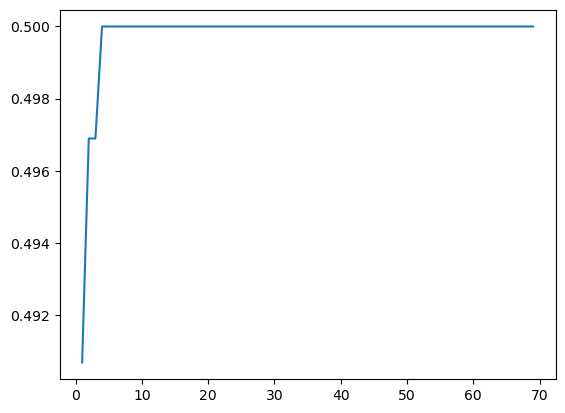

In [16]:
findK_auc(X_train, y_train)

When k = 4, AUC = 0.5.

In [38]:
knn_ori = KNeighborsClassifier(n_neighbors = 4)

In [39]:
knn_ori.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [40]:
y_pred_ori = knn_ori.predict(X_test)

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
# for test dataset
getFeedback(y_test, y_pred_ori)

- Accuracy
0.0
- Recall
0.0
- AUC
0.5
- Confusion Matrix
[[161   0]
 [ 11   0]]


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# for train datase
getFeedback(y_train, knn_ori.predict(X_train))

- Accuracy
0.0
- Recall
0.0
- AUC
0.5
- Confusion Matrix
[[642   0]
 [ 44   0]]


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.1.2 OverSampling Dataset

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

16
0.5719932241671373


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

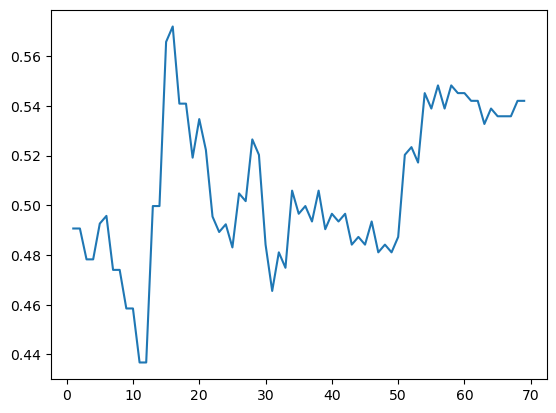

In [17]:
findK_auc(X_overS, y_overS)

When k = 16, AUC = 0.57

In [43]:
knn_over = KNeighborsClassifier(n_neighbors = 16)

In [45]:
knn_over.fit(X_overS, y_overS)

KNeighborsClassifier(n_neighbors=16)

In [46]:
knn_over.fit(X_overS, y_overS)

KNeighborsClassifier(n_neighbors=16)

In [47]:
y_pred_overS = knn_over.predict(X_test)

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
# test
getFeedback(y_test, y_pred_overS)

- Accuracy
0.09090909090909091
- Recall
0.45454545454545453
- AUC
0.5719932241671373
- Confusion Matrix
[[111  50]
 [  6   5]]


In [65]:
# train
getFeedback(y_overS, knn_over.predict(X_overS))

- Accuracy
0.7674418604651163
- Recall
0.9766355140186916
- AUC
0.8403426791277259
- Confusion Matrix
[[452 190]
 [ 15 627]]


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 2.1.3 UnderSampling Dataset

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

9
0.6360813099943534


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

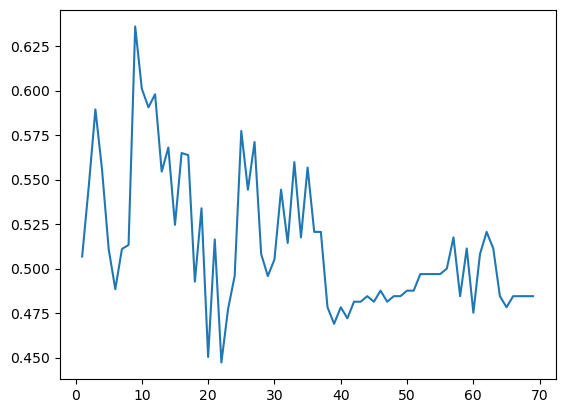

In [67]:
findK_auc(X_underS, y_underS)

In [69]:
# k = 9, AUC = 0.636

In [71]:
knn_under = KNeighborsClassifier(n_neighbors = 9)

In [72]:
knn_under.fit(X_underS, y_underS)

KNeighborsClassifier(n_neighbors=9)

In [73]:
y_pred_underS = knn_under.predict(X_test)

/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [78]:
# test
getFeedback(y_test, y_pred_underS)

- Accuracy
0.12
- Recall
0.5454545454545454
- AUC
0.6360813099943534
- Confusion Matrix
[[117  44]
 [  5   6]]


In [77]:
# train
getFeedback(y_underS, knn_under.predict(X_underS))

- Accuracy
0.7307692307692307
- Recall
0.4318181818181818
- AUC
0.6363636363636365
- Confusion Matrix
[[37  7]
 [25 19]]


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### KNN, using UnderSampling, with k = 9, achieves the best accuracy and auc.

/var/folders/ws/9bp_fdcn56g0xqdlv4kc0t440000gn/T/ipykernel_1054/3979959752.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


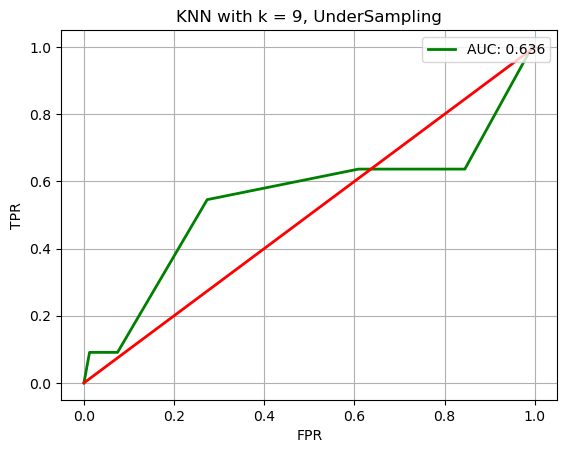

In [82]:
p_pro = knn_under.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_underS)
fprs,tprs,t=roc_curve(y_test,p_pro)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fprs,tprs,"g",lw=2,label="AUC: %.3f"%auc)
plt.plot([0,1],[0,1],"r",lw=2)
plt.legend(loc="upper right")
plt.title("KNN with k = 9, UnderSampling")
plt.grid(b=True)
plt.show()

In [84]:
getFeedback(y_test, y_pred_underS)

- Accuracy
0.12
- Recall
0.5454545454545454
- AUC
0.6360813099943534
- Confusion Matrix
[[117  44]
 [  5   6]]


In [86]:
# Skater

In [194]:
model = InMemoryModel(knn_under.predict_proba, examples = X_train)

In [196]:
interpreter = Interpretation()

In [197]:
interpreter.load_data(X_train)

In [198]:
interpreter.feature_importance.feature_importance(model)

[13/13] features ████████████████████ Time elapsed: 0 seconds

Dx:CIN                             0.000000
Dx:Cancer                          0.000431
Dx:HPV                             0.000431
Dx                                 0.000862
STDs (number)                      0.013799
Smokes (packs/year)                0.015093
IUD (years)                        0.021130
Smokes (years)                     0.075895
Num of pregnancies                 0.091419
Number of sexual partners          0.122467
First sexual intercourse           0.150927
Hormonal Contraceptives (years)    0.199655
Age                                0.307891
dtype: float64

[13/13] features ████████████████████ Time elapsed: 0 seconds

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

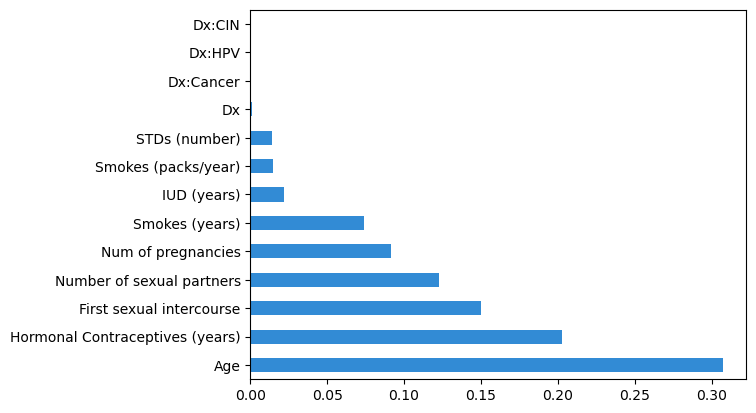

In [199]:
interpreter.feature_importance.plot_feature_importance(model, ascending=True)

[2/2] grid cells ████████████████████ Time elapsed: 0 secondsds

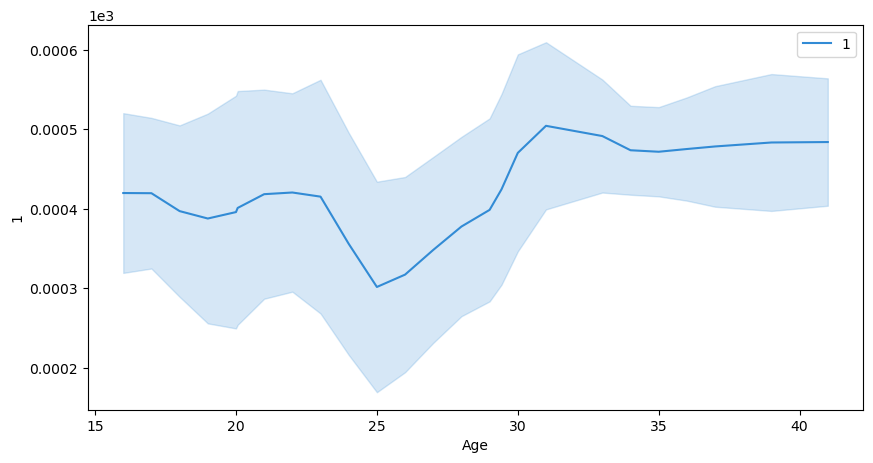

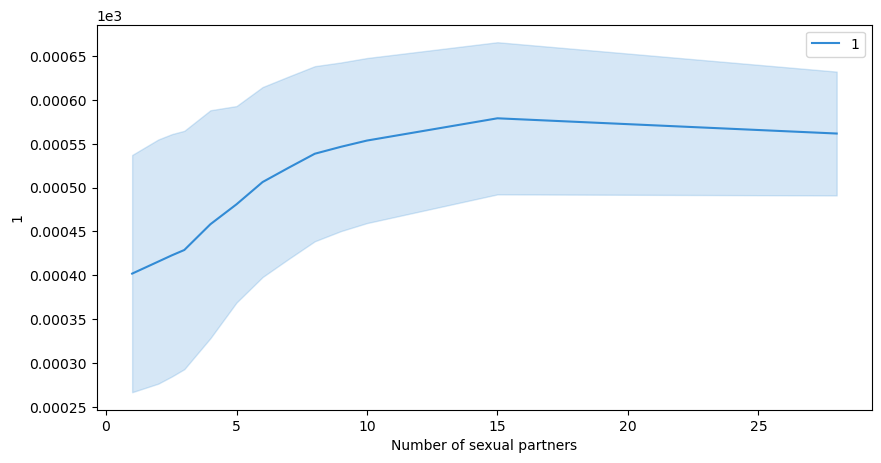

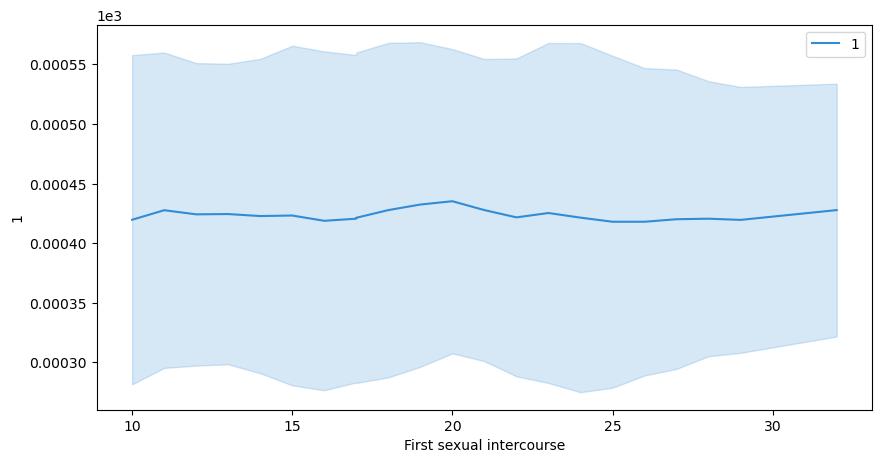

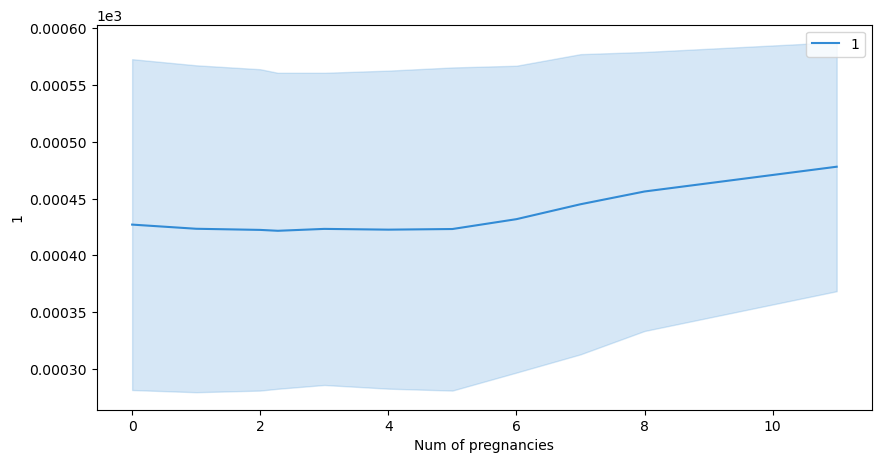

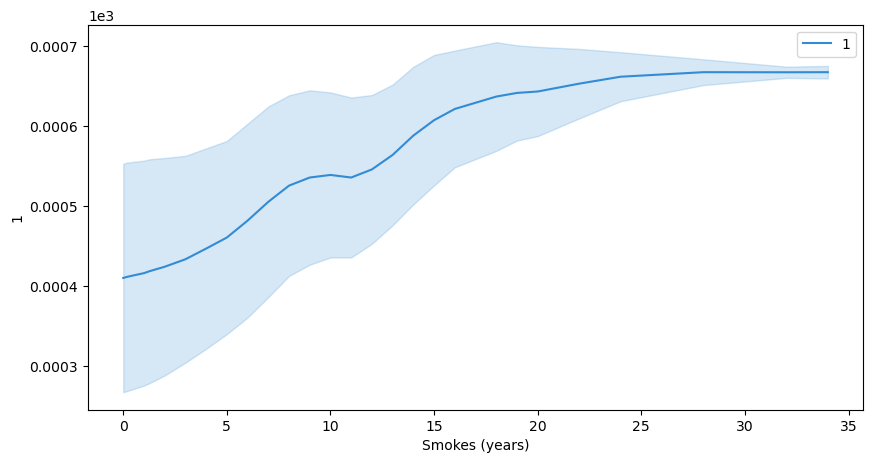

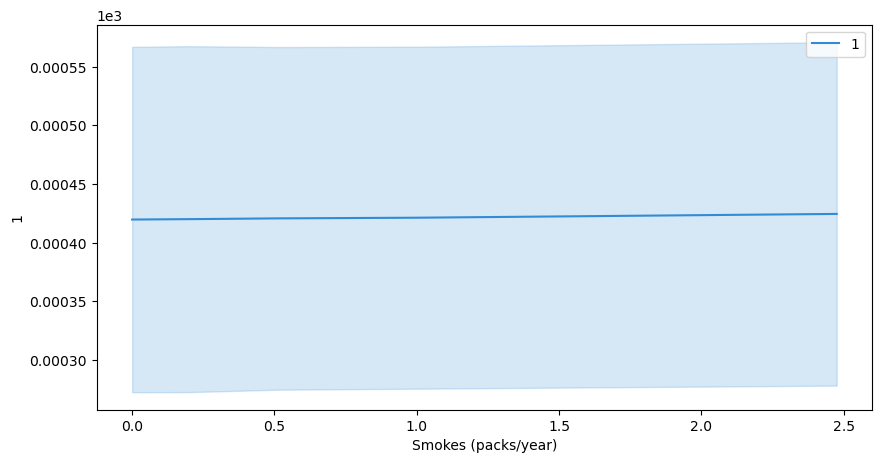

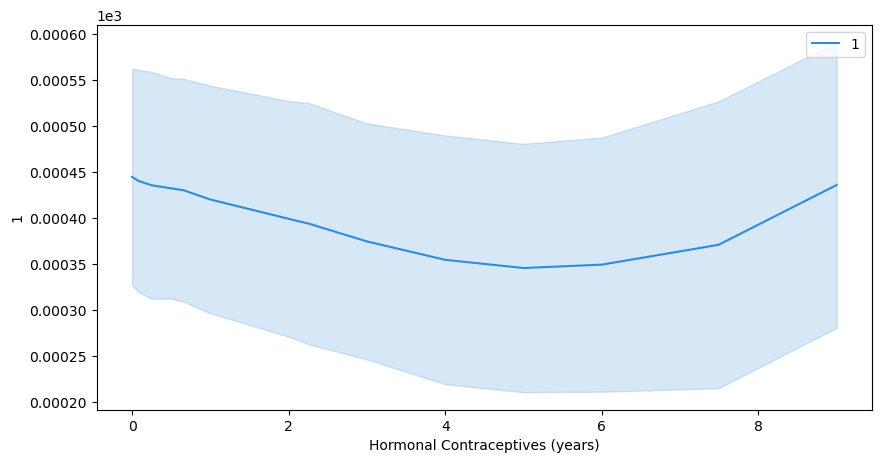

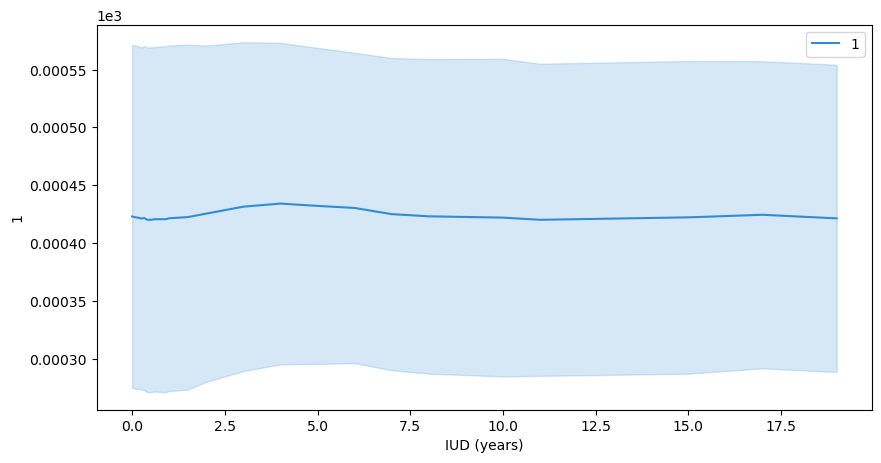

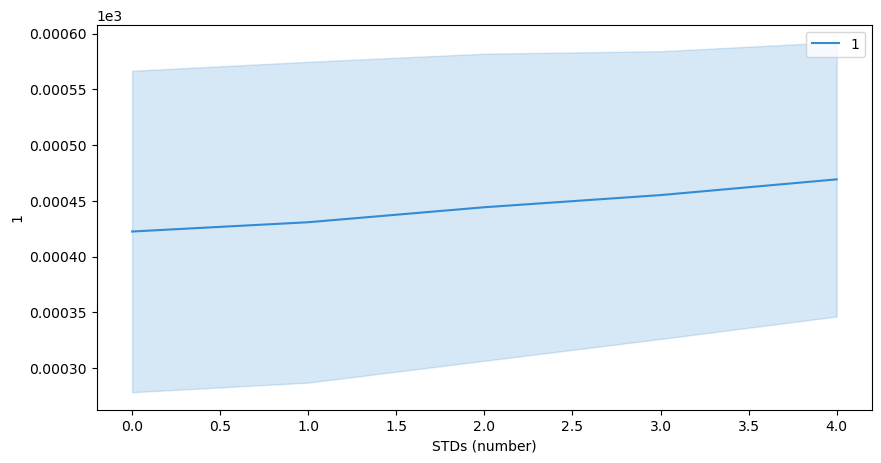

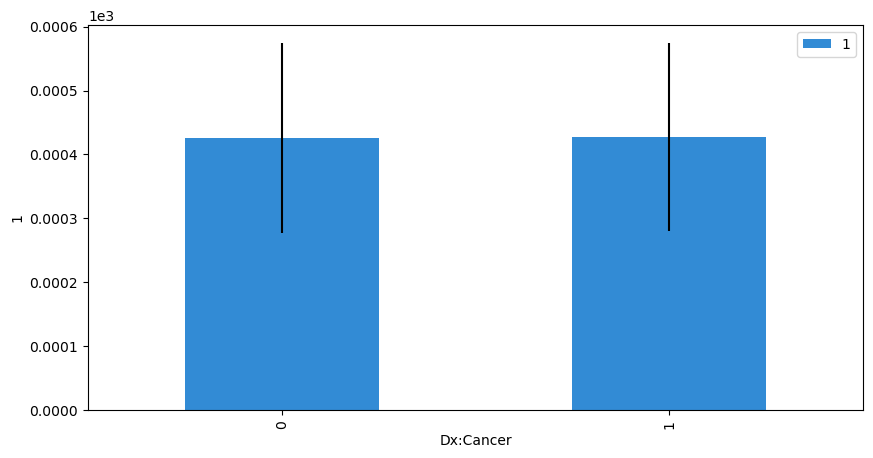

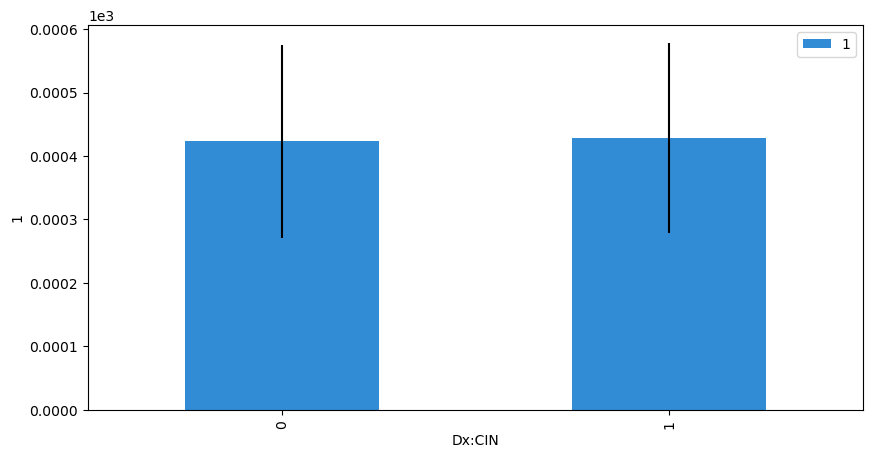

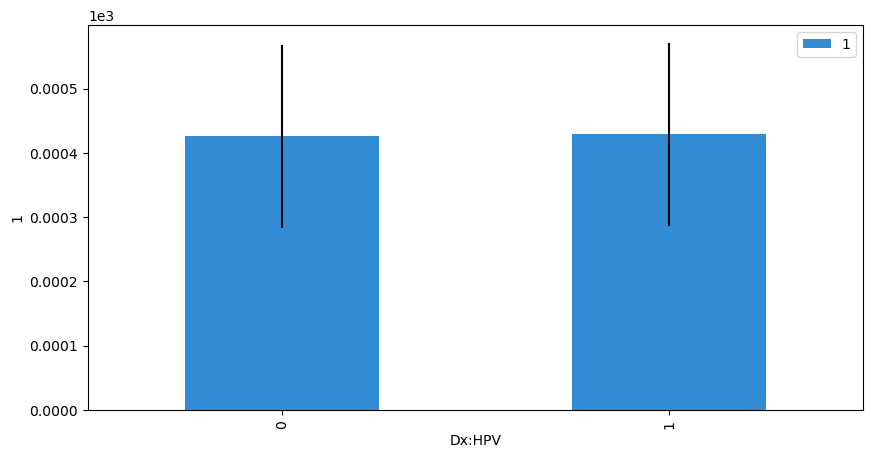

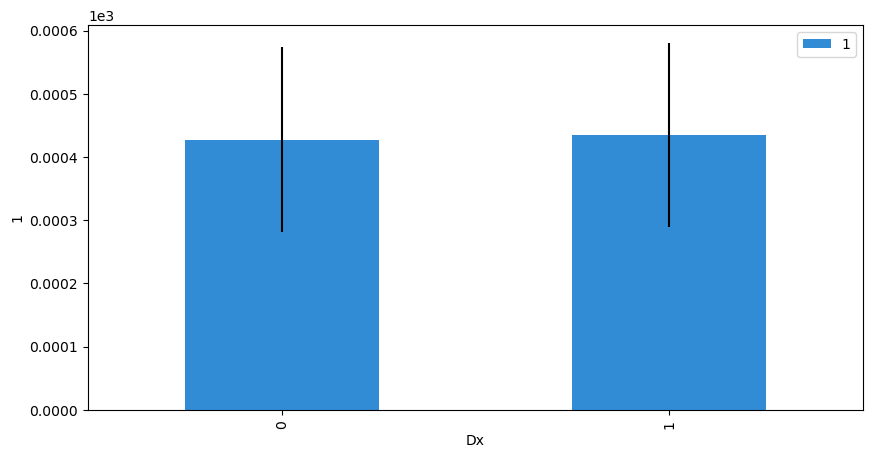

In [200]:
for key in X_underS.keys():
    axes_list = interpreter.partial_dependence.plot_partial_dependence([key], model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

### 2.2 Decision Tree

In [94]:
from sklearn import tree

### 2.2.1 class_weight = 'balanced'

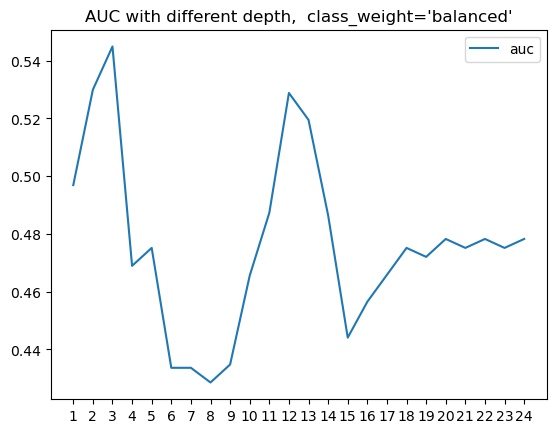

3
0.5448898927159795


In [98]:
aucs = []
biggestauc = 0
smallestk = 1

for i in range(1,25):
    clf1 = tree.DecisionTreeClassifier(
                            max_depth=i,
                            class_weight='balanced')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    if (auc > biggestauc):
        smallestk = i
        biggestauc = auc
    aucs.append(auc)

plt.plot(range(1,25), aucs, label='auc')
plt.xticks(range(1,25))
plt.title("AUC with different depth,  class_weight='balanced'")
plt.legend()
plt.show()
print(smallestk)
print(biggestauc)

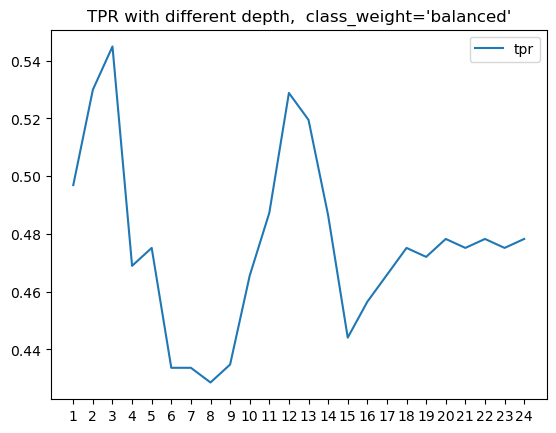

3
0.6363636363636364


In [99]:
# TPR ~ max_depth
tprs = []
biggesttpr = 0
smallestk = 1

for i in range(1,25):
    clf1 = tree.DecisionTreeClassifier(
                            max_depth=i,
                            class_weight='balanced')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tpr = cm[1][1] / (cm[1][1] + cm[1][0])
    if (tpr > biggesttpr):
        smallestk = i
        biggesttpr = tpr
    tprs.append(tpr)

plt.plot(range(1,25), aucs, label='tpr')
plt.xticks(range(1,25))
plt.title("TPR with different depth,  class_weight='balanced'")
plt.legend()
plt.show()
print(smallestk)
print(biggesttpr)

In [100]:
# max_depth = 3 leads to the best AUC and TPR performance when using balanced str

In [101]:
clf_bal = tree.DecisionTreeClassifier(max_depth = 3, class_weight='balanced')
clf_bal.fit(X_train, y_train)
y_pred_bal = clf_bal.predict(X_test)

In [102]:
# test
getFeedback(y_test, y_pred_bal)

- Accuracy
0.07368421052631578
- Recall
0.6363636363636364
- AUC
0.5448898927159795
- Confusion Matrix
[[73 88]
 [ 4  7]]


In [103]:
# train
getFeedback(y_train, clf_bal.predict(X_train))

- Accuracy
0.10303030303030303
- Recall
0.7727272727272727
- AUC
0.6558340413480599
- Confusion Matrix
[[346 296]
 [ 10  34]]


### 2.2.1 OverSampling Dataset

In [107]:
def findK_auc_dt(X_t, y_t):
    aucs = []
    biggestauc = 0
    smallestk = 1

    for i in range(1,25):
        clf = tree.DecisionTreeClassifier(
                            max_depth=i)
        clf.fit(X_t, y_t)
        y_pred = clf.predict(X_test)
        auc = roc_auc_score(y_test, y_pred)
        if (auc > biggestauc):
            smallestk = i
            biggestauc = auc
        aucs.append(auc)

    plt.plot(range(1,25), aucs, label='auc')
    plt.xticks(range(1,25))
    plt.title("AUC with different depths")
    plt.legend()
    plt.show()
    print(smallestk)
    print(biggestauc)

In [132]:
def findK_tpr_dt(X_t, y_t):
    tprs = []
    biggesttpr = 0
    smallestk = 1

    for i in range(1,25):
        clf1 = tree.DecisionTreeClassifier(
                            max_depth=i)
        clf1.fit(X_t, y_t)
        y_pred = clf1.predict(X_test)
        auc = roc_auc_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        tpr = cm[1][1] / (cm[1][1] + cm[1][0])
        if (tpr > biggesttpr):
            smallestk = i
            biggesttpr = tpr
        tprs.append(tpr)

    plt.plot(range(1,25), aucs, label='tpr')
    plt.xticks(range(1,25))
    plt.title("TPR with different depths")
    plt.legend()
    plt.show()
    print(smallestk)
    print(biggesttpr)

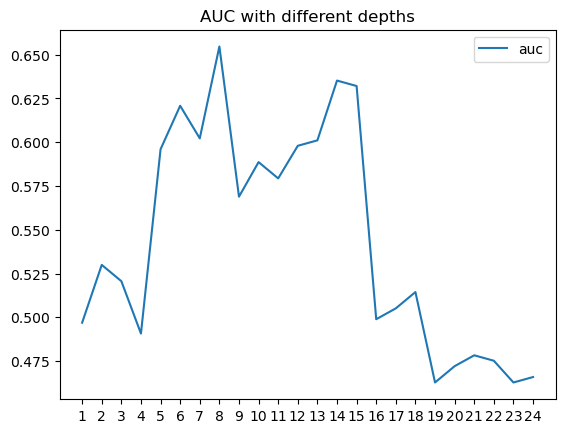

8
0.6547148503670243


In [133]:
findK_auc_dt(X_overS, y_overS)

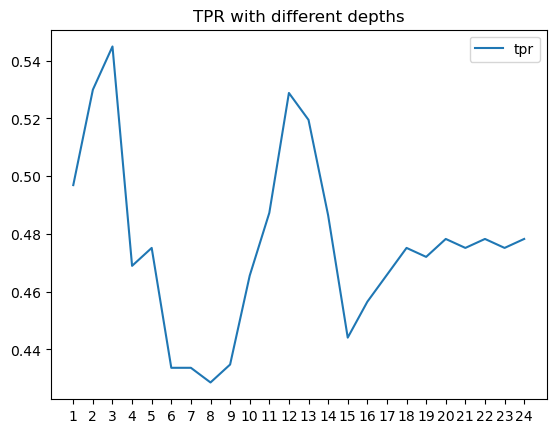

8
0.5454545454545454


In [134]:
findK_tpr_dt(X_overS, y_overS)

In [111]:
# max_depth = 8 leads to the best AUC performance when using oversampling stargey

In [112]:
clf_over = tree.DecisionTreeClassifier(max_depth = 8)
clf_over.fit(X_overS, y_overS)
y_pred_over = clf_over.predict(X_test)

In [114]:
# test
getFeedback(y_test, y_pred_over)

- Accuracy
0.13636363636363635
- Recall
0.5454545454545454
- AUC
0.6547148503670243
- Confusion Matrix
[[123  38]
 [  5   6]]


In [115]:
# train
getFeedback(y_overS, clf_over.predict(X_overS))

- Accuracy
0.8242811501597445
- Recall
0.8037383177570093
- AUC
0.8161993769470405
- Confusion Matrix
[[532 110]
 [126 516]]


### 2.2.2 UnderSampling Dataset

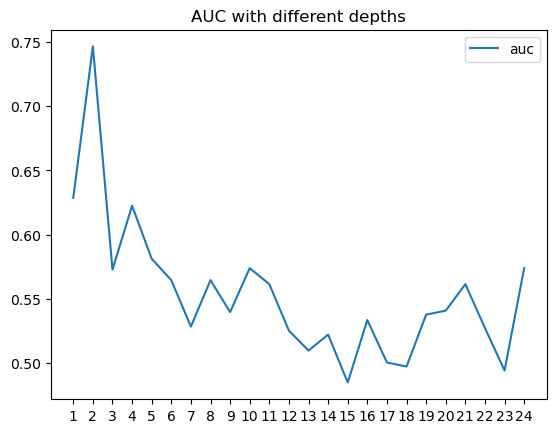

2
0.7464709203839639


In [135]:
findK_auc_dt(X_underS, y_underS)

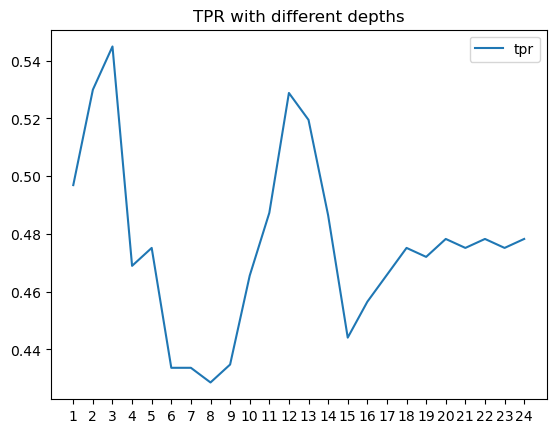

2
0.9090909090909091


In [136]:
findK_tpr_dt(X_underS, y_underS)

In [156]:
# max_depth = 2 leads to the best AUC performance when using undersampling stargey

clf_under = tree.DecisionTreeClassifier(max_depth = 2)
clf_under.fit(X_underS, y_underS)
y_pred_under = clf_under.predict(X_test)

In [157]:
# test
getFeedback(y_test, y_pred_under)

- Accuracy
0.12987012987012986
- Recall
0.9090909090909091
- AUC
0.7464709203839639
- Confusion Matrix
[[94 67]
 [ 1 10]]


In [158]:
# train
getFeedback(y_underS, clf_under.predict(X_underS))

- Accuracy
0.7
- Recall
0.6363636363636364
- AUC
0.6818181818181819
- Confusion Matrix
[[32 12]
 [16 28]]


### Decision tree, using UnderSampling, with max_depth = 2, achieves the best accuracy and auc.

## This is the best model!

/var/folders/ws/9bp_fdcn56g0xqdlv4kc0t440000gn/T/ipykernel_1054/1269711559.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


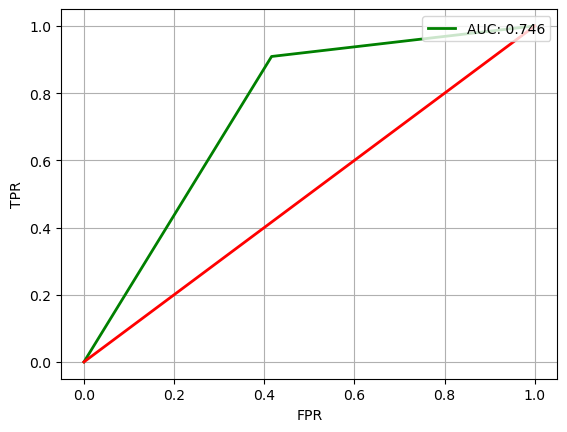

In [159]:
fprs3,tprs3,t=roc_curve(y_test,y_pred_under)
auc = roc_auc_score(y_test, y_pred_under)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fprs3,tprs3,"g",lw=2,label="AUC: %.3f"%auc)
plt.plot([0,1],[0,1],"r",lw=2)
plt.legend(loc="upper right")
plt.grid(b=True)
plt.show()

In [160]:
getFeedback(y_test, y_pred_under)

- Accuracy
0.12987012987012986
- Recall
0.9090909090909091
- AUC
0.7464709203839639
- Confusion Matrix
[[94 67]
 [ 1 10]]


In [161]:
# Skater

In [188]:
model = InMemoryModel(clf_under.predict_proba, examples = X_train)

In [189]:
interpreter = Interpretation()

In [190]:
interpreter.load_data(X_train)

In [191]:
interpreter.feature_importance.feature_importance(model)

[13/13] features ████████████████████ Time elapsed: 0 seconds

Age                                0.000000
Number of sexual partners          0.000000
First sexual intercourse           0.000000
Smokes (packs/year)                0.000000
Hormonal Contraceptives (years)    0.000000
IUD (years)                        0.000000
Dx:Cancer                          0.000000
Dx:CIN                             0.000000
Dx:HPV                             0.000000
Dx                                 0.000000
Smokes (years)                     0.162528
STDs (number)                      0.196388
Num of pregnancies                 0.641084
dtype: float64

[13/13] features ████████████████████ Time elapsed: 0 seconds

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

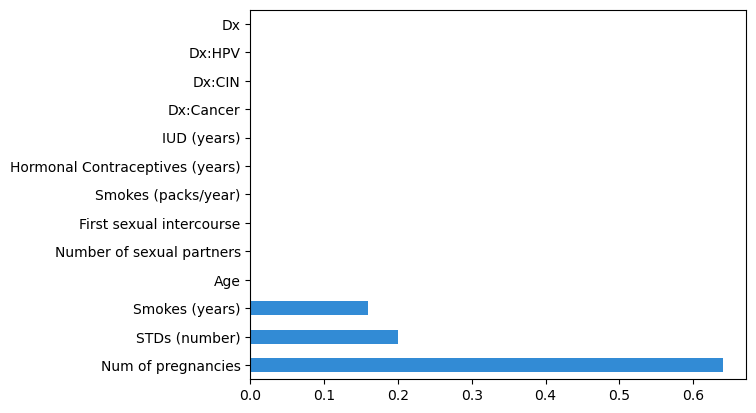

In [192]:
interpreter.feature_importance.plot_feature_importance(model, ascending=True)

[2/2] grid cells ████████████████████ Time elapsed: 0 secondsds

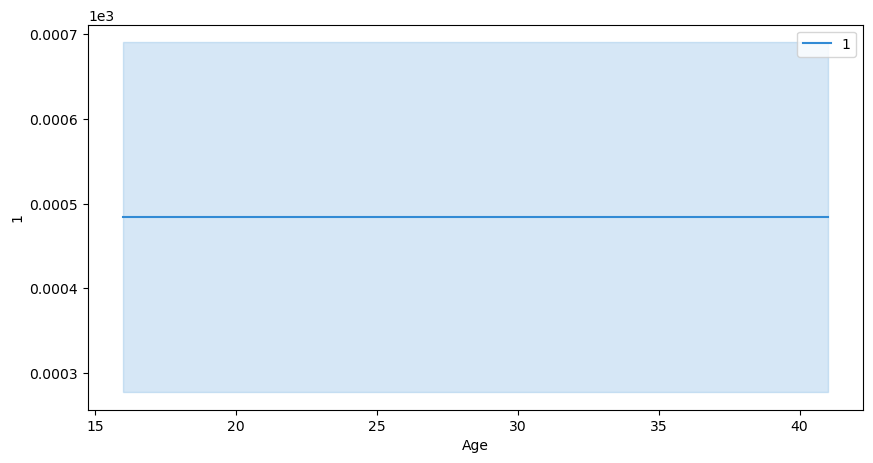

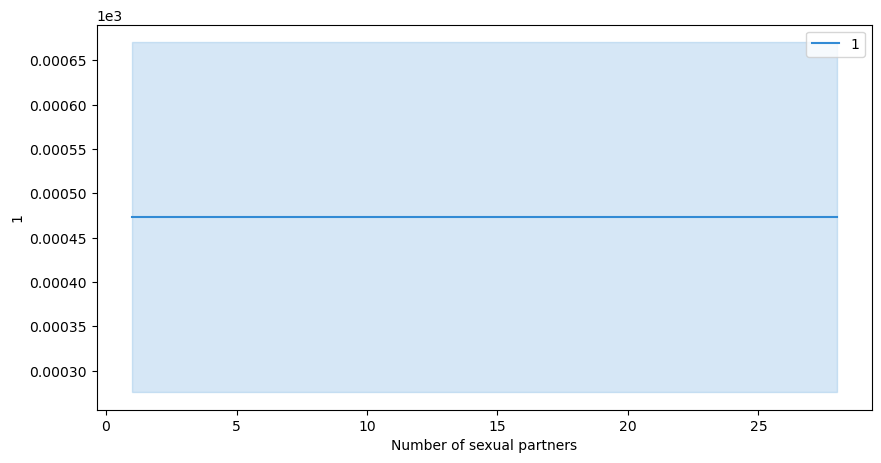

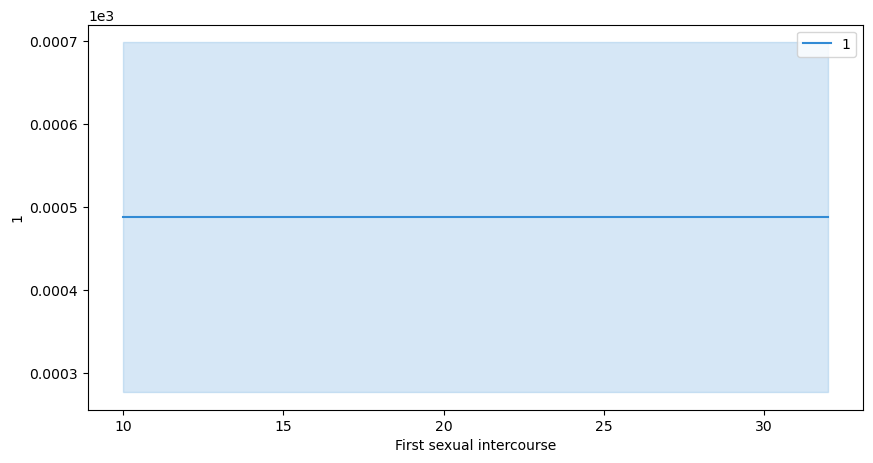

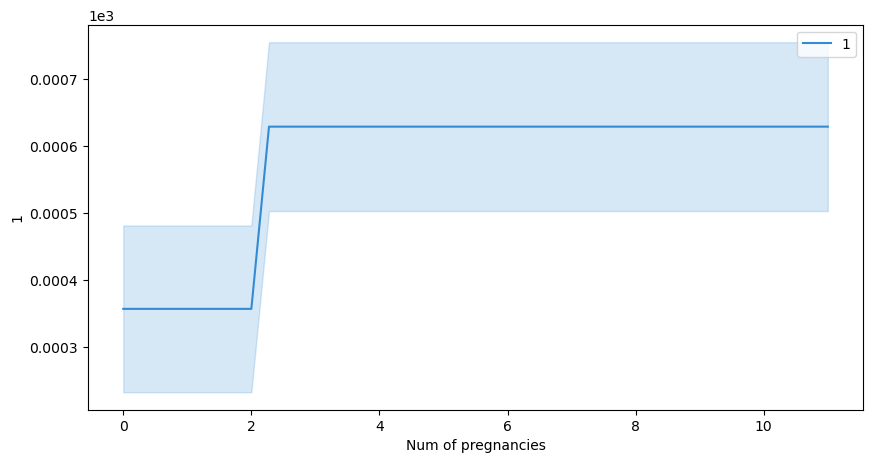

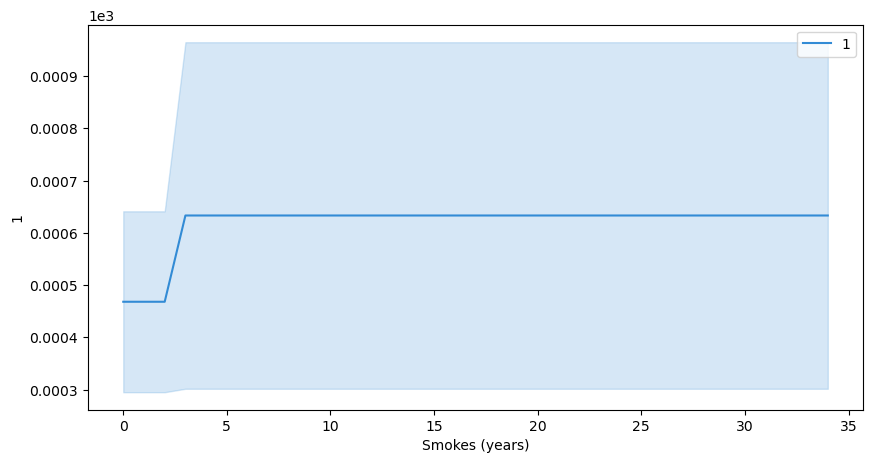

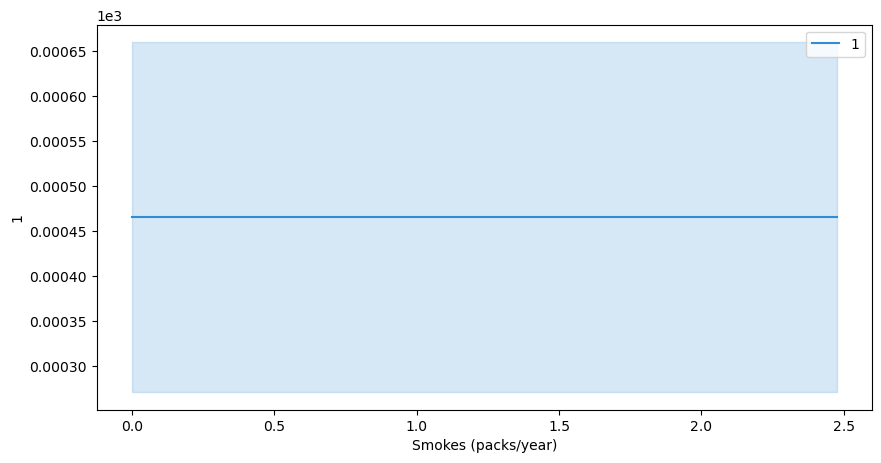

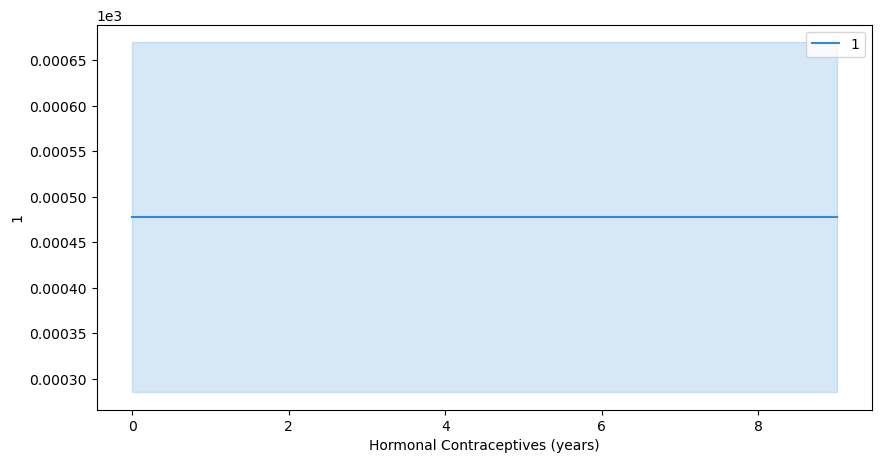

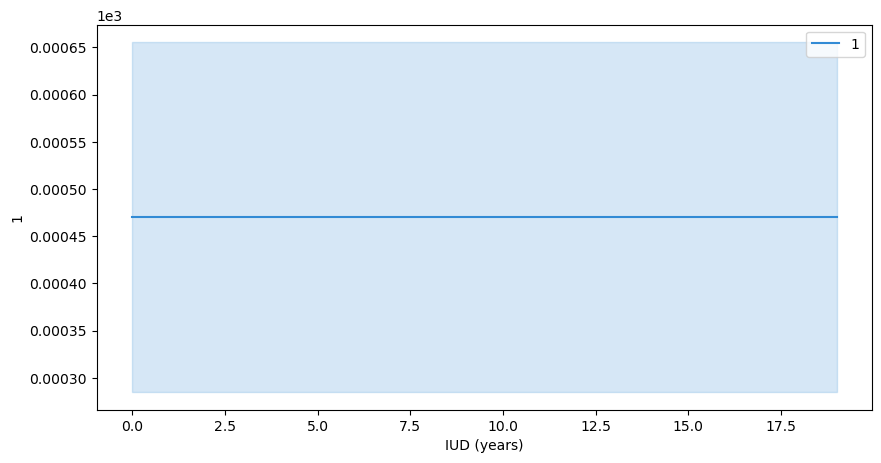

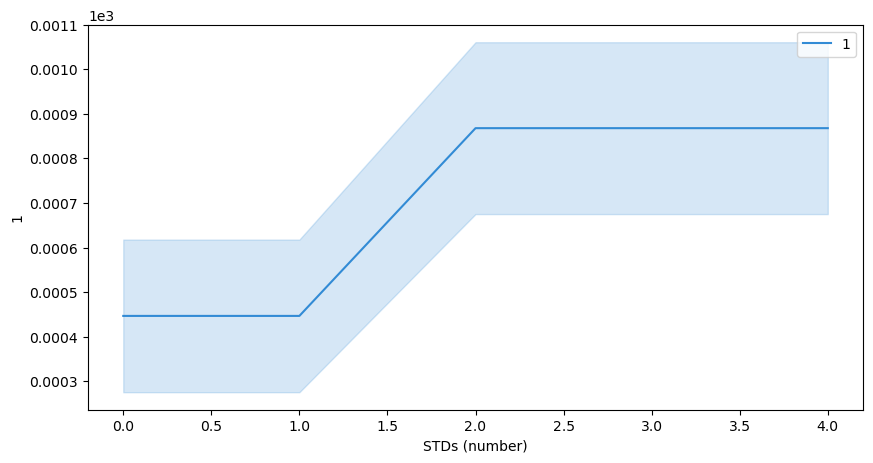

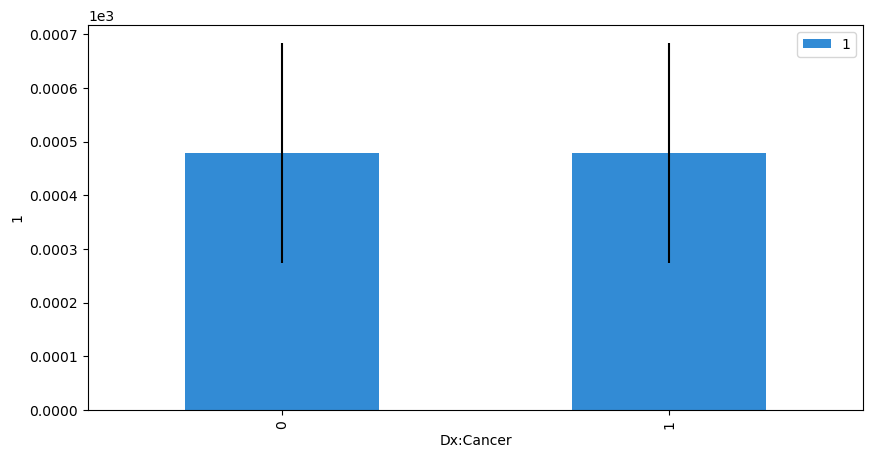

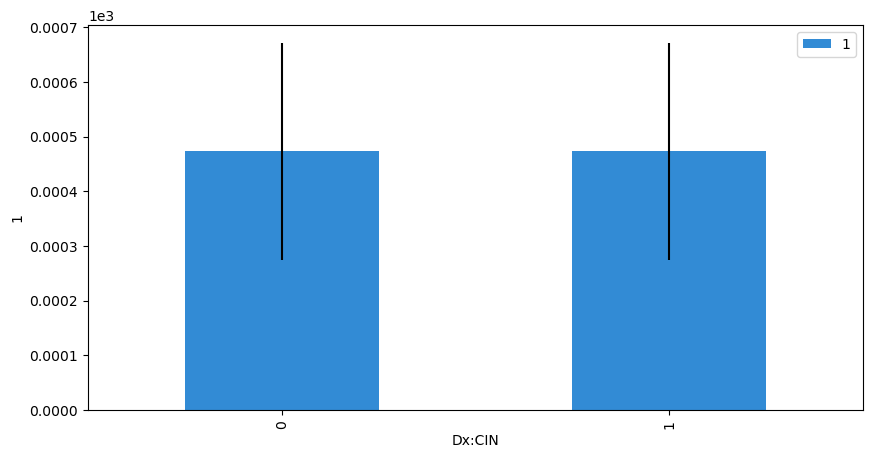

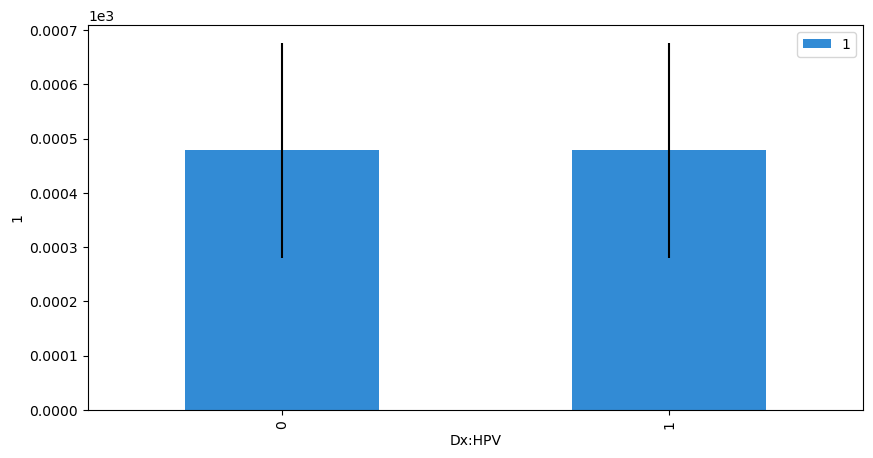

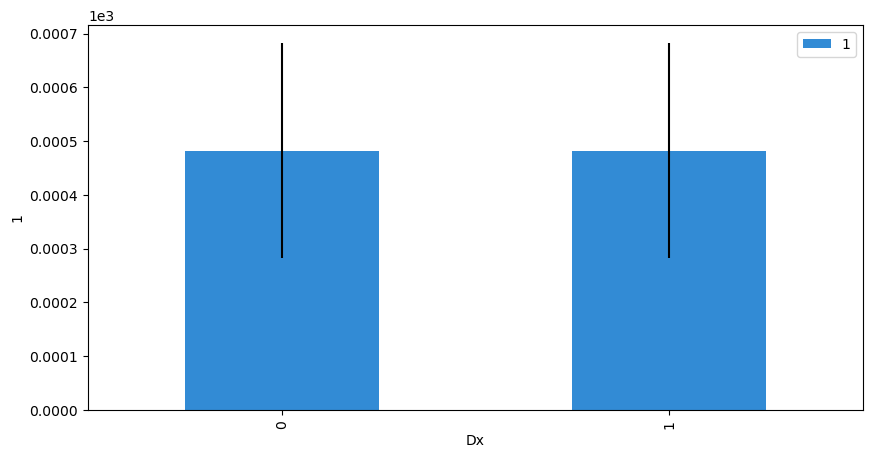

In [193]:
for key in X_underS.keys():
    axes_list = interpreter.partial_dependence.plot_partial_dependence([key], model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

### 2.3 Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

### 2.3.1 Original Dataset

In [207]:
def findn_AUC(X_t, y_t):
    aucs = []
    biggestauc = 0
    smallest_n = 1
    smallest_m = 1

    for i in range(1,20):
        for j in range(1, 40):
            clf1 = RandomForestClassifier(
            n_estimators = i * 10,
            max_depth = j)
            clf1.fit(X_t, y_t)
            y_p = clf1.predict(X_test)
            auc = roc_auc_score(y_test, y_p)
            if (auc > biggestauc):
                smallest_n = i
                smallest_m = j
                biggestauc = auc
            aucs.append(auc)

    print(smallest_n)
    print(smallest_m)
    print(biggestauc)

In [208]:
def find_TPR(X_t, y_t):
    # TPR ~ max_depth
    tprs = []
    biggesttpr = 0
    smallest_n = 1
    smallest_m = 1
    
    for i in range(1,20):
        for j in range(1, 40):
            clf2 = RandomForestClassifier(
            n_estimators = i * 10,
            max_depth = j)
            clf2.fit(X_t, y_t)
            y_p = clf2.predict(X_test)
            cm = confusion_matrix(y_test, y_p)
            tpr = cm[1][1] / (cm[1][1] + cm[1][0])
            if (tpr > biggesttpr):
                smallest_n = i
                smallest_m = j
                biggesttpr = tpr
            tprs.append(tpr)
           
    print(smallest_n)
    print(smallest_m)
    print(biggesttpr)

In [209]:
findn_AUC(X_train, y_train)

1
17
0.5454545454545454


In [210]:
find_TPR(X_train, y_train)

1
7
0.09090909090909091


In [213]:
clf2 = RandomForestClassifier(
            n_estimators = 10,
            max_depth = 17)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [214]:
# test
getFeedback(y_test, y_pred)

- Accuracy
0.5
- Recall
0.09090909090909091
- AUC
0.5423489553924337
- Confusion Matrix
[[160   1]
 [ 10   1]]


In [217]:
# train
getFeedback(y_train, clf2.predict(X_train))

- Accuracy
1.0
- Recall
0.3409090909090909
- AUC
0.6704545454545454
- Confusion Matrix
[[642   0]
 [ 29  15]]


### 2.3.2 Oversampling Dataset

In [218]:
findn_AUC(X_overS, y_overS)

1
5
0.735460191981931


In [219]:
find_TPR(X_overS, y_overS)

1
4
0.45454545454545453


In [252]:
clf1 = RandomForestClassifier(
            n_estimators = 10,
            max_depth = 5)
clf1.fit(X_overS, y_overS)
y_p = clf1.predict(X_test)

In [253]:
# test
getFeedback(y_test, y_p)

- Accuracy
0.375
- Recall
0.5454545454545454
- AUC
0.7416713721061546
- Confusion Matrix
[[151  10]
 [  5   6]]


In [254]:
# train
getFeedback(y_overS, clf1.predict(X_overS))

- Accuracy
0.9318681318681319
- Recall
0.660436137071651
- AUC
0.8060747663551403
- Confusion Matrix
[[611  31]
 [218 424]]


### 2.3.3 Undersampling Dataset

In [287]:
findn_AUC(X_underS, y_underS)

1
5
0.7518351214003388


In [288]:
find_TPR(X_underS, y_underS)

1
9
0.8181818181818182


In [317]:
clf1 = RandomForestClassifier(
            n_estimators = 10,
            max_depth = 5)
clf1.fit(X_underS, y_underS)
y_p = clf1.predict(X_test)

In [318]:
# test
getFeedback(y_test, y_p)

- Accuracy
0.125
- Recall
0.8181818181818182
- AUC
0.7134387351778657
- Confusion Matrix
[[98 63]
 [ 2  9]]


In [319]:
# train
getFeedback(y_underS, clf1.predict(X_underS))

- Accuracy
0.8947368421052632
- Recall
0.7727272727272727
- AUC
0.8409090909090909
- Confusion Matrix
[[40  4]
 [10 34]]


/var/folders/ws/9bp_fdcn56g0xqdlv4kc0t440000gn/T/ipykernel_1054/2860894987.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


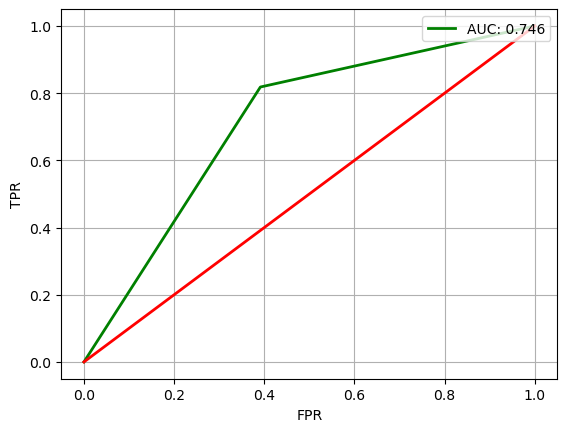

In [320]:
# graph
fprs1,tprs1,t=roc_curve(y_test,y_p)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fprs1,tprs1,"g",lw=2,label="AUC: %.3f"%auc)
plt.plot([0,1],[0,1],"r",lw=2)
plt.legend(loc="upper right")
plt.grid(b=True)
plt.show()

In [322]:
# Skater
y_prb = clf1.predict_proba(X_test)
model = InMemoryModel(clf1.predict_proba, examples = X_underS)

In [323]:
interpreter = Interpretation()

In [324]:
interpreter.load_data(X_underS)

In [325]:
interpreter.feature_importance.feature_importance(model)

[13/13] features ████████████████████ Time elapsed: 0 seconds

Dx:CIN                             0.009923
Dx:HPV                             0.019496
Dx:Cancer                          0.026304
Dx                                 0.041282
Smokes (packs/year)                0.046121
IUD (years)                        0.046834
Number of sexual partners          0.067827
STDs (number)                      0.084177
Age                                0.093297
Smokes (years)                     0.099843
Num of pregnancies                 0.102736
First sexual intercourse           0.106177
Hormonal Contraceptives (years)    0.255983
dtype: float64

[13/13] features ████████████████████ Time elapsed: 0 seconds

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

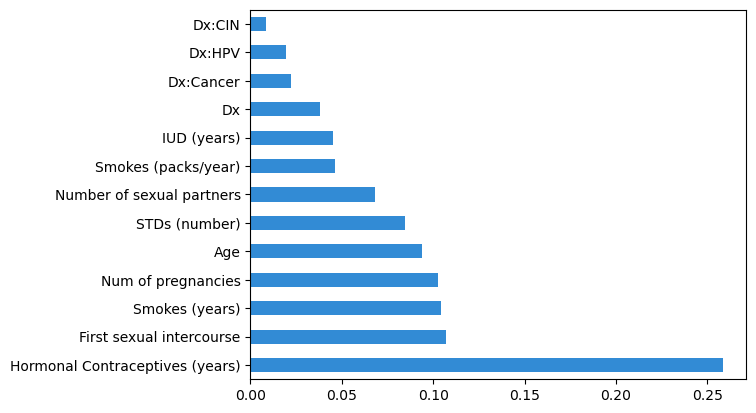

In [326]:
interpreter.feature_importance.plot_feature_importance(model, ascending=True)

[2/2] grid cells ████████████████████ Time elapsed: 0 secondsds

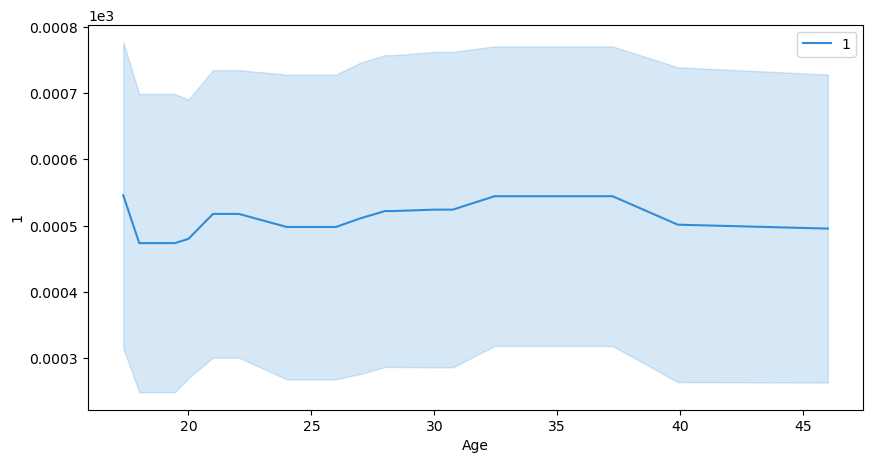

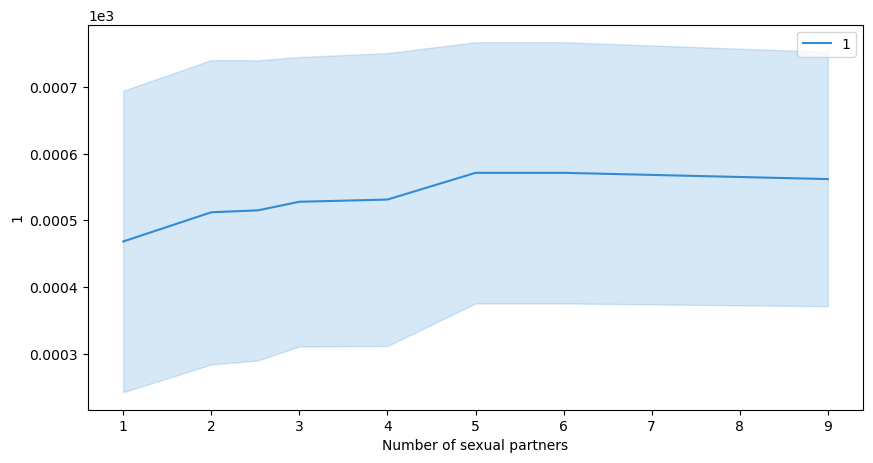

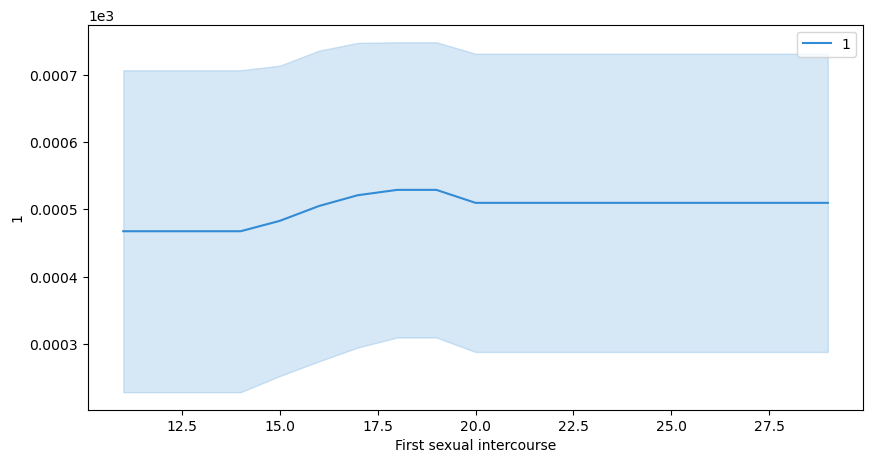

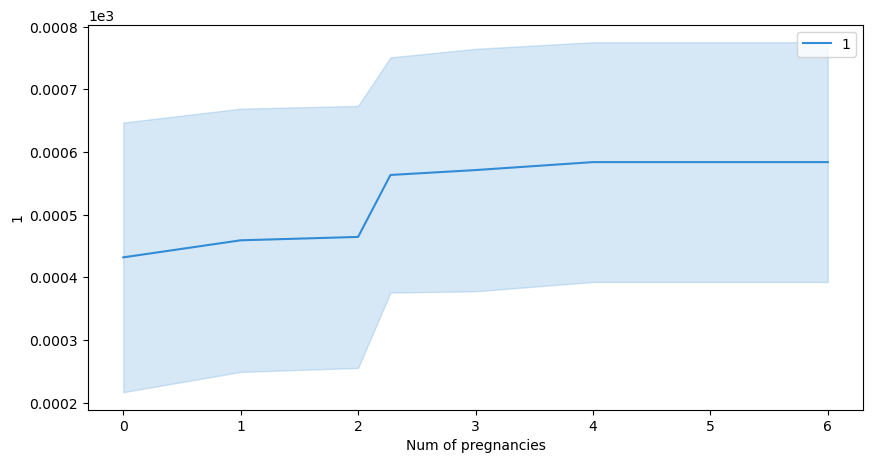

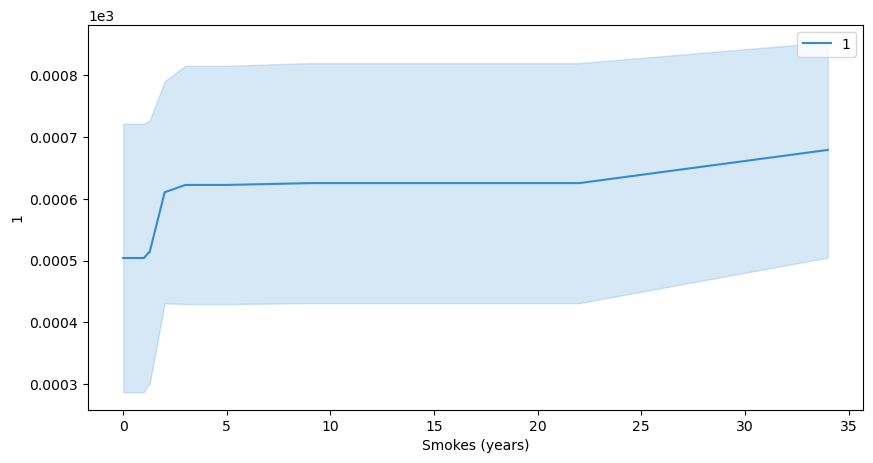

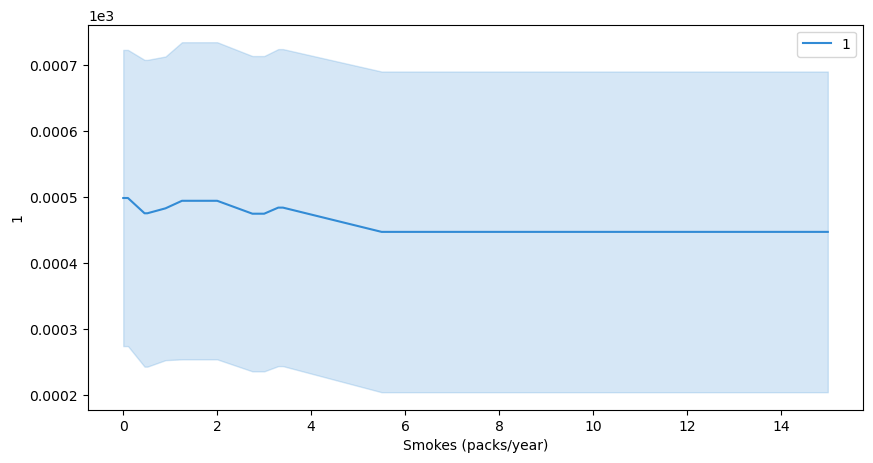

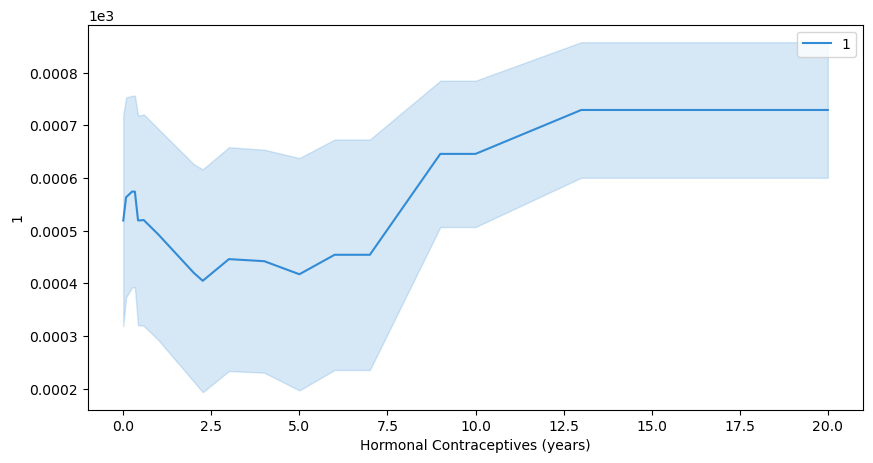

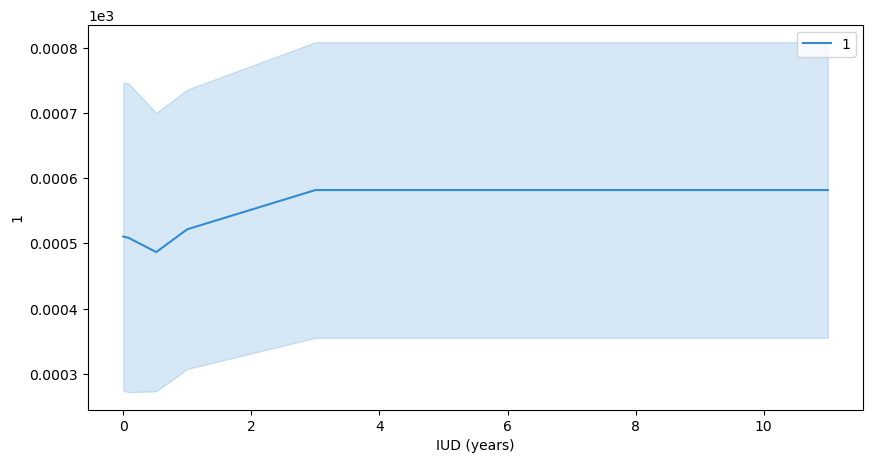

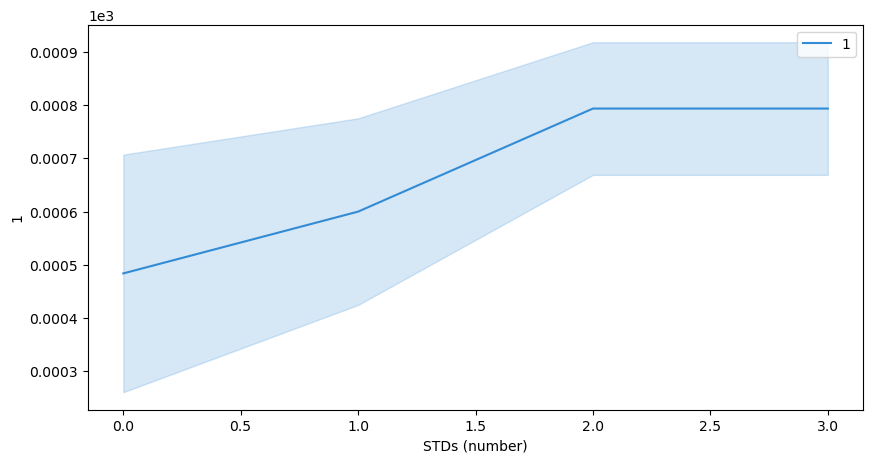

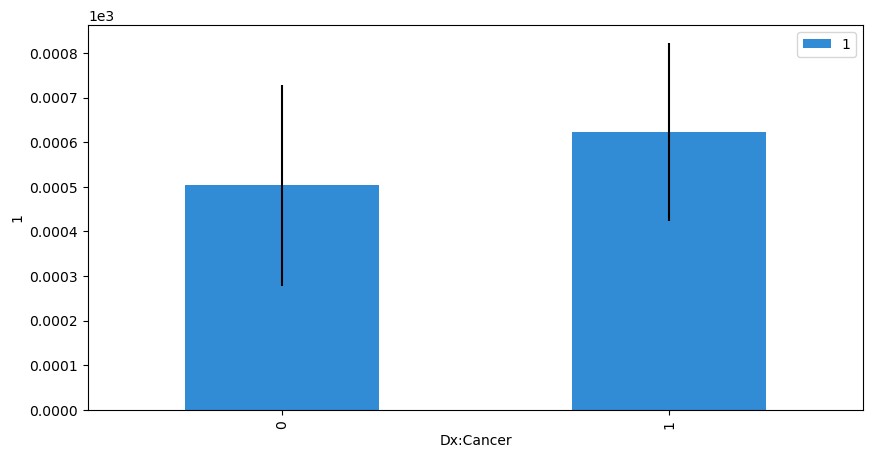

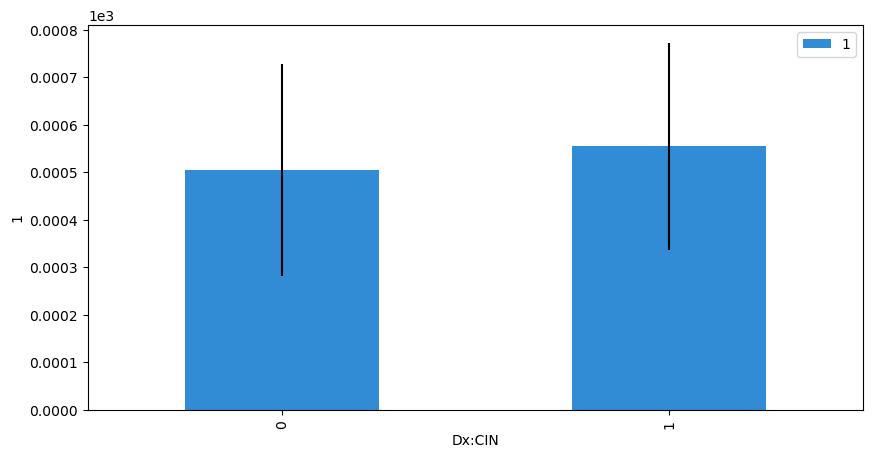

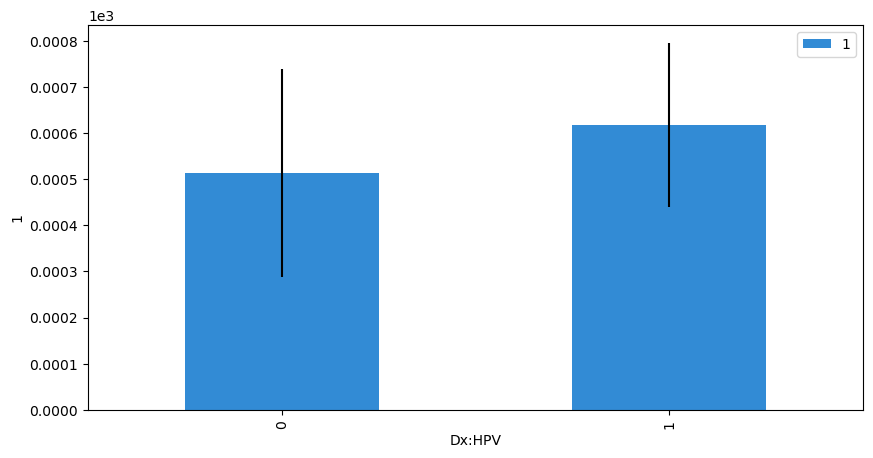

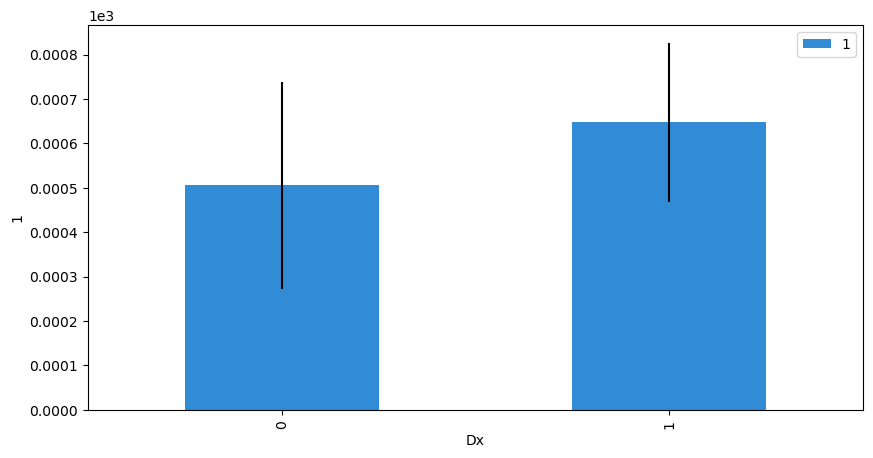

In [327]:
for key in X_underS.keys():
    axes_list = interpreter.partial_dependence.plot_partial_dependence([key], model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

## 3. Ensemble Model

In [328]:
from sklearn.ensemble import VotingClassifier

In [329]:

knn = KNeighborsClassifier(n_neighbors = 9)
clf_decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
clf_random_forest = RandomForestClassifier(
            n_estimators = 10,
            max_depth = 5)

In [351]:
model = VotingClassifier(estimators=[('knn', knn), ('dt', clf_decision_tree), ('rf', clf_random_forest)], voting = 'soft')

In [354]:
model.fit_transform(X_underS, y_underS)
y_pred_knn_e = model.fit_transform(X_underS, y_underS)[:, 0]
y_pred_dt_e = model.fit_transform(X_underS, y_underS)[:, 1]
y_pred_rf_e = model.fit_transform(X_underS, y_underS)[:, 2]
model.fit_transform(X_underS, y_underS)

array([[0.55555556, 0.44444444, 0.66666667, 0.33333333, 0.7982633 ,
        0.2017367 ],
       [0.77777778, 0.22222222, 0.4137931 , 0.5862069 , 0.64029264,
        0.35970736],
       [0.66666667, 0.33333333, 0.66666667, 0.33333333, 0.71839346,
        0.28160654],
       [0.66666667, 0.33333333, 0.66666667, 0.33333333, 0.73482049,
        0.26517951],
       [0.55555556, 0.44444444, 0.66666667, 0.33333333, 0.64288056,
        0.35711944],
       [0.33333333, 0.66666667, 0.4137931 , 0.5862069 , 0.72098047,
        0.27901953],
       [0.55555556, 0.44444444, 0.4137931 , 0.5862069 , 0.53161072,
        0.46838928],
       [0.55555556, 0.44444444, 0.66666667, 0.33333333, 0.69709936,
        0.30290064],
       [0.55555556, 0.44444444, 0.66666667, 0.33333333, 0.74540872,
        0.25459128],
       [0.55555556, 0.44444444, 0.66666667, 0.33333333, 0.63424222,
        0.36575778],
       [0.77777778, 0.22222222, 0.4137931 , 0.5862069 , 0.7135603 ,
        0.2864397 ],
       [0.88888889, 0

### After ensembling

In [355]:
# train
p_pred_ensemble_t = model.predict(X_underS)
confusion_ee = confusion_matrix(y_underS, p_pred_ensemble_t)
confusion_ee

array([[42,  2],
       [17, 27]])

In [356]:
# test
y_pred_ensemble = model.predict(X_test)
getFeedback(y_test, y_pred_ensemble)

- Accuracy
0.1320754716981132
- Recall
0.6363636363636364
- AUC
0.6753246753246753
- Confusion Matrix
[[115  46]
 [  4   7]]


### Before ensembling

In [357]:
# KNN
knn.fit(X_underS, y_underS)
getFeedback(y_test, knn.predict(X_test))

- Accuracy
0.12
- Recall
0.5454545454545454
- AUC
0.6360813099943534
- Confusion Matrix
[[117  44]
 [  5   6]]


/Users/yirun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [358]:
# Decision tree
clf_decision_tree.fit(X_underS, y_underS)
getFeedback(y_test, clf_decision_tree.predict(X_test))

- Accuracy
0.12987012987012986
- Recall
0.9090909090909091
- AUC
0.7464709203839639
- Confusion Matrix
[[94 67]
 [ 1 10]]


In [359]:
# Random Forest
clf_random_forest.fit(X_underS, y_underS)
getFeedback(y_test, clf_random_forest.predict(X_test))

- Accuracy
0.14545454545454545
- Recall
0.7272727272727273
- AUC
0.717673630717109
- Confusion Matrix
[[114  47]
 [  3   8]]


### Decision Tree gets better result than the ensemble model

### Skater on ensemble model

In [361]:
model = InMemoryModel(model.predict_proba, examples = X_underS)

In [362]:
interpreter = Interpretation()

In [363]:
interpreter.load_data(X_underS)

In [364]:
interpreter.feature_importance.feature_importance(model)

[13/13] features ████████████████████ Time elapsed: 0 seconds

Dx:CIN                             0.003229
Dx:Cancer                          0.007154
IUD (years)                        0.017982
Dx                                 0.020393
Dx:HPV                             0.023805
Smokes (packs/year)                0.043946
First sexual intercourse           0.084443
Number of sexual partners          0.094793
Smokes (years)                     0.110256
STDs (number)                      0.110546
Age                                0.154095
Hormonal Contraceptives (years)    0.159544
Num of pregnancies                 0.169813
dtype: float64

[13/13] features ████████████████████ Time elapsed: 0 seconds

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

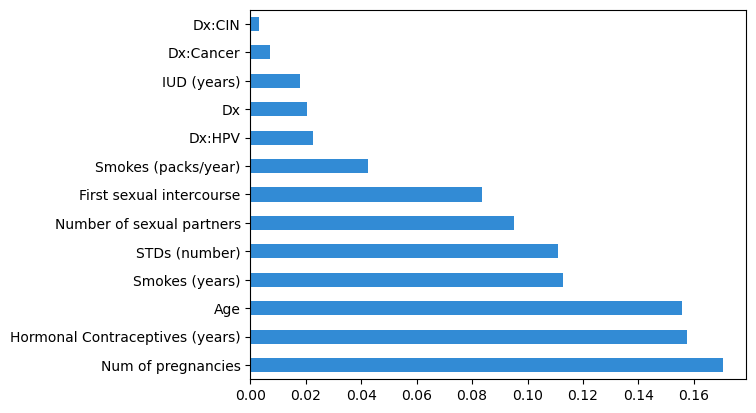

In [365]:
interpreter.feature_importance.plot_feature_importance(model, ascending=True)

[2/2] grid cells ████████████████████ Time elapsed: 0 secondsds

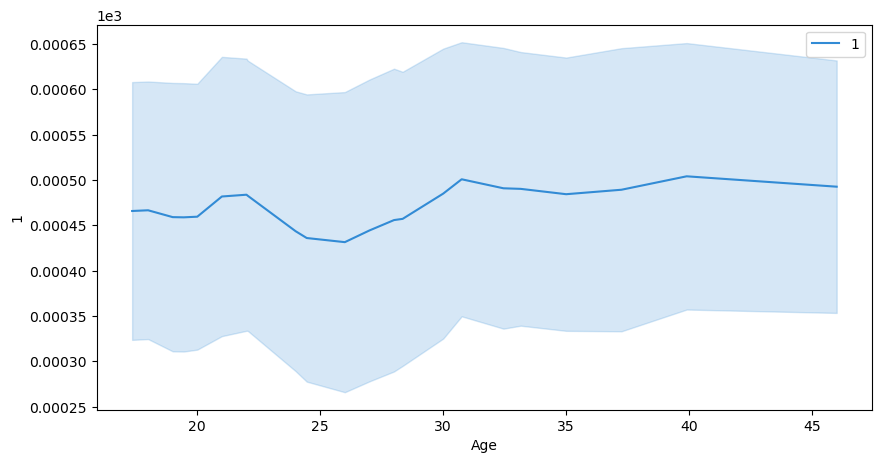

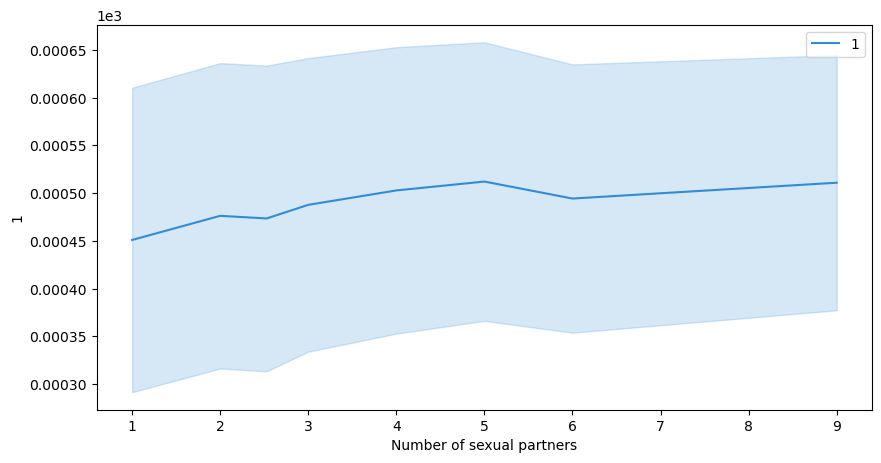

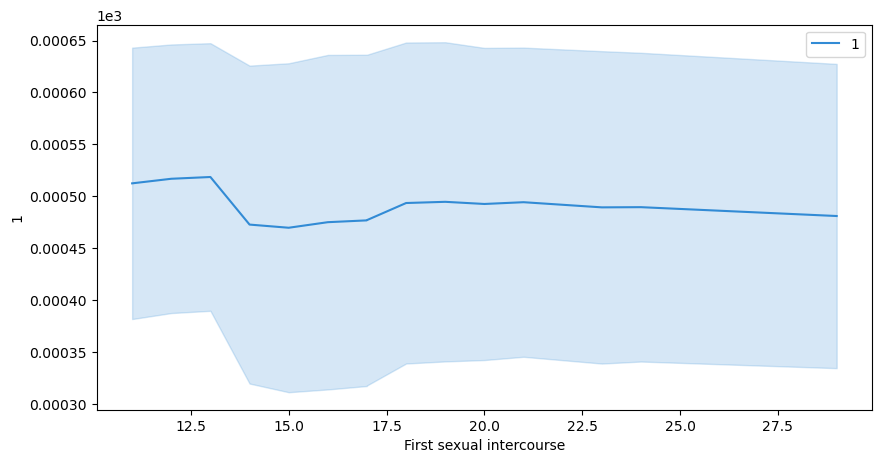

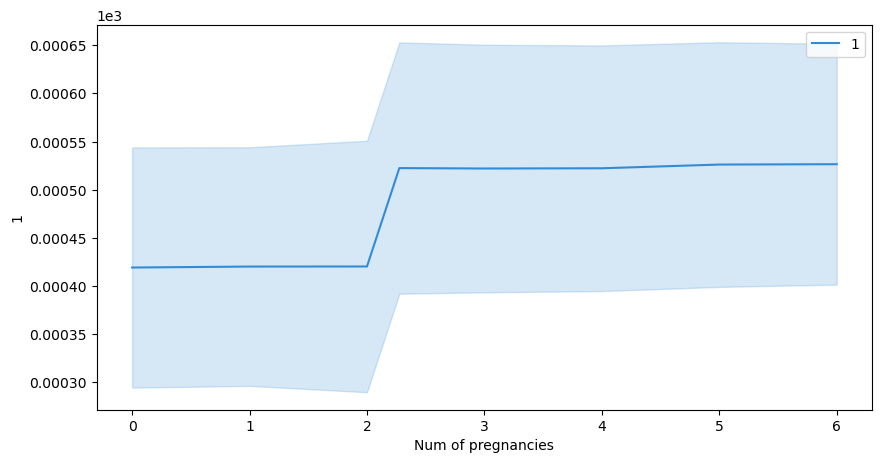

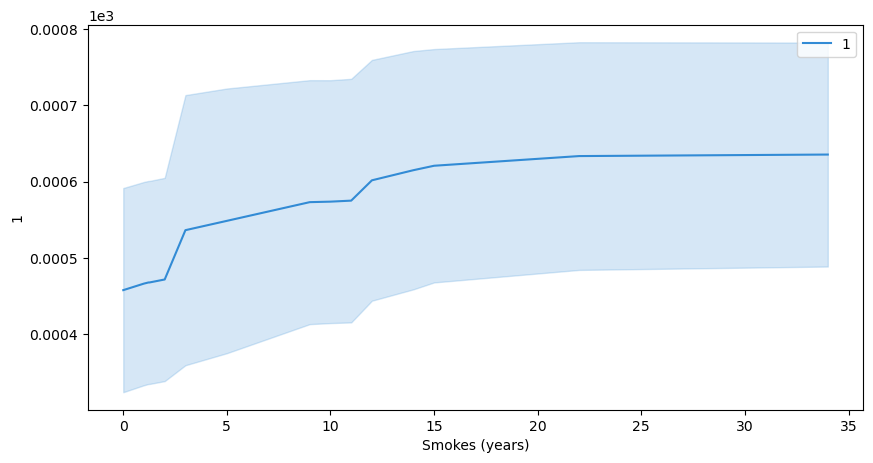

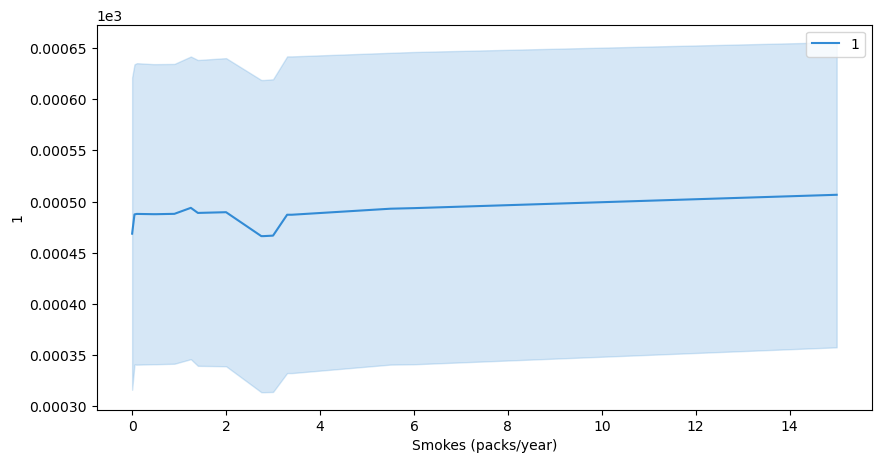

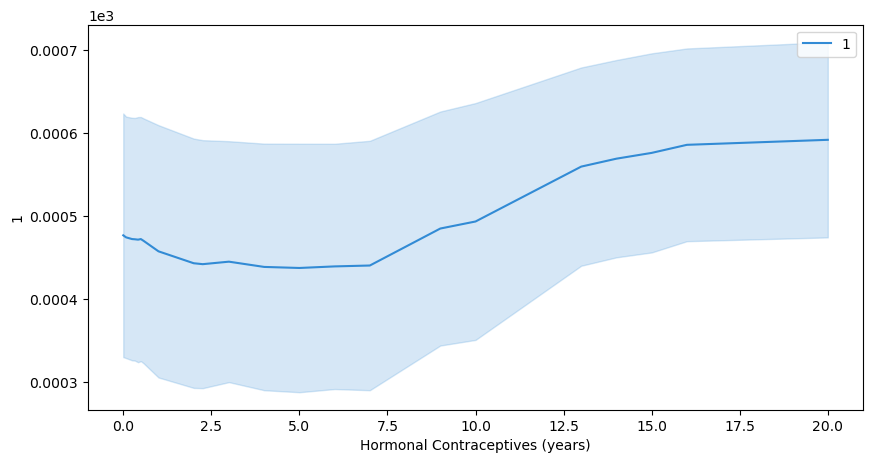

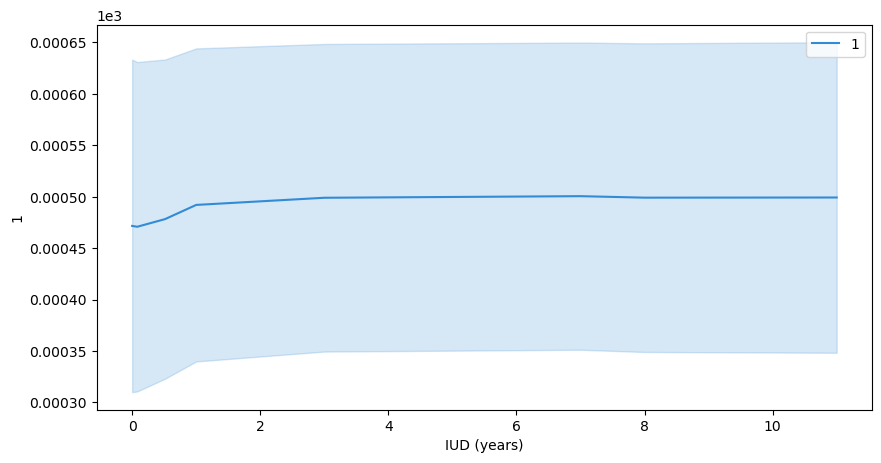

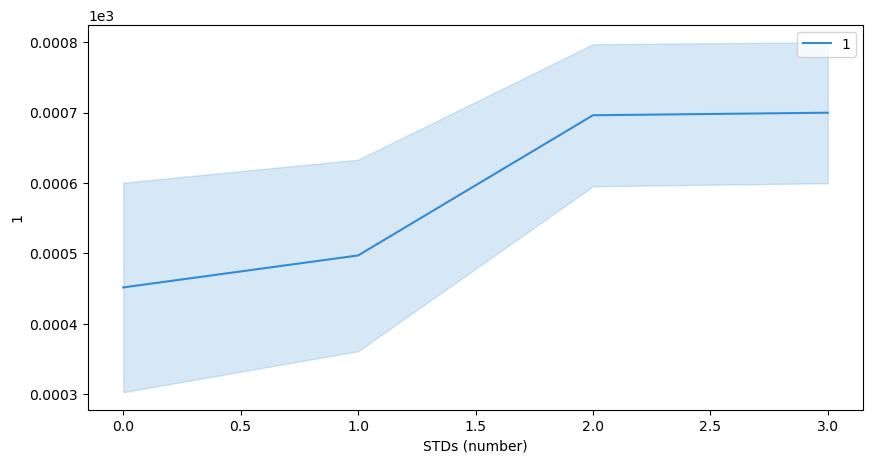

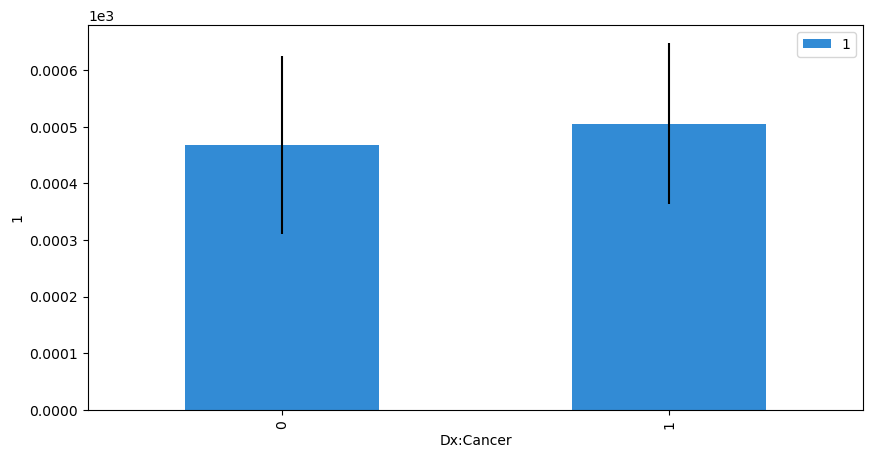

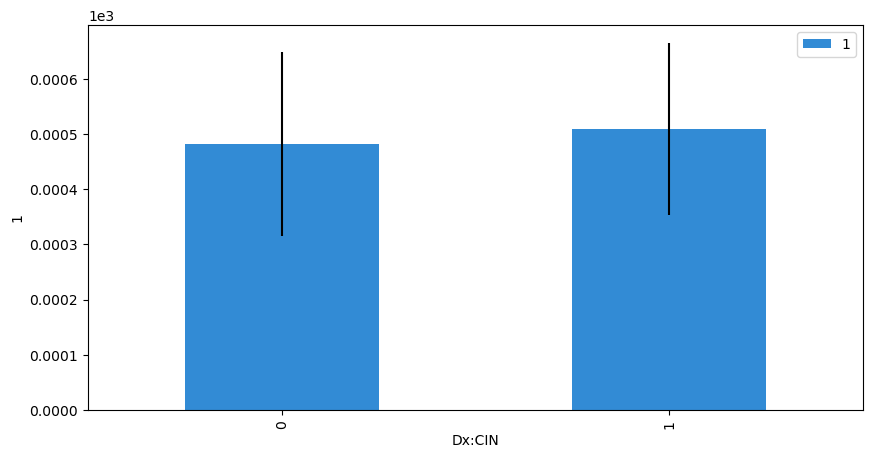

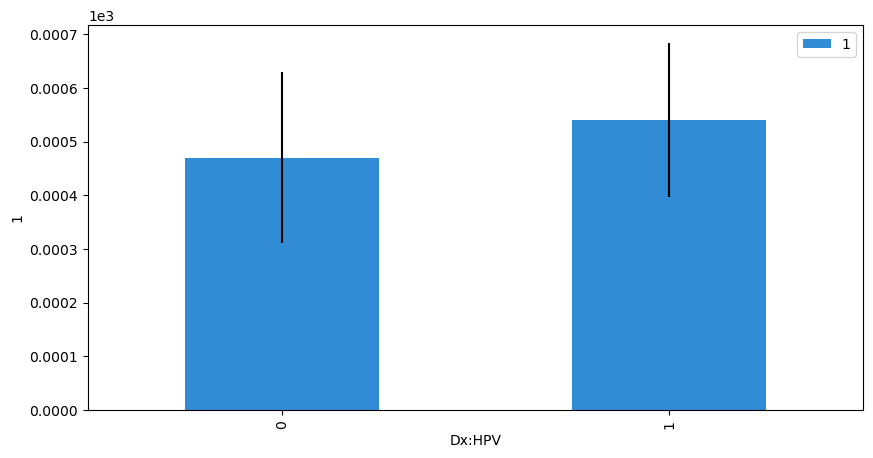

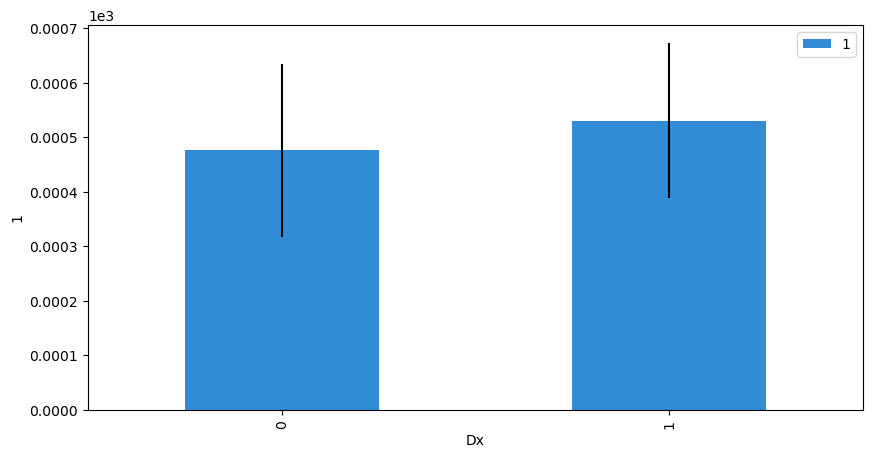

In [366]:
for key in X_underS.keys():
    axes_list = interpreter.partial_dependence.plot_partial_dependence([key], model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))